In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

df = pd.read_csv('LosAngeles_Earthquake_Dataset.csv')

# Define features and target variable
X = df.drop(columns=['mag', 'class'])  # All columns except 'mag' and 'class'
y = df['mag']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=20,max_features='sqrt', min_samples_leaf=2, min_samples_split=2)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

print(f'RMSE: {rmse}')

RMSE: 0.4684004734553313


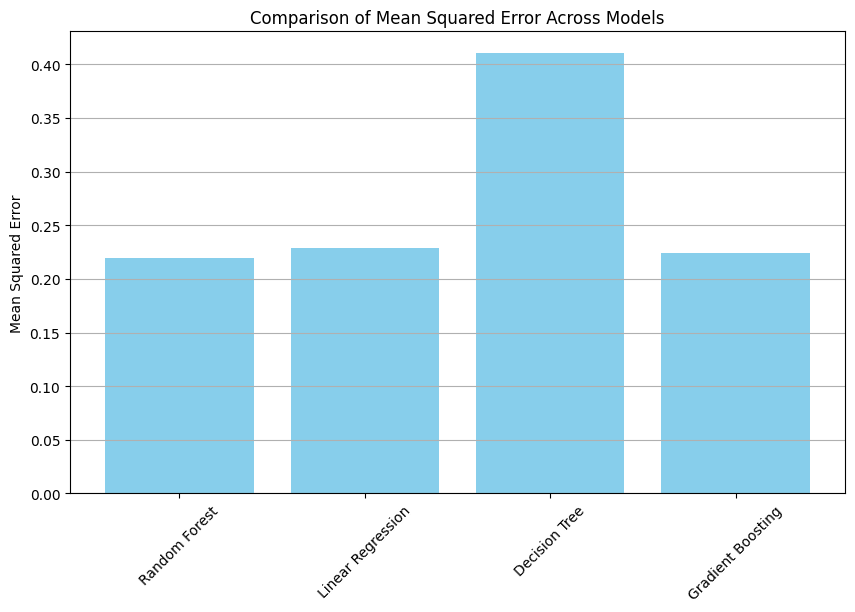

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define the models to compare
models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42, max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=2),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=20),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, random_state=42, max_depth=5)
}

# Evaluate each model
mse_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append((name, mse))

# Convert results to a DataFrame for easier visualization
mse_df = pd.DataFrame(mse_results, columns=['Model', 'MSE'])

# Create a bar chart for comparing MSE
plt.figure(figsize=(10, 6))
plt.bar(mse_df['Model'], mse_df['MSE'], color='skyblue')
plt.title('Comparison of Mean Squared Error Across Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



/var/folders/qr/423qchy15dv31l6h2rxmgplh0000gn/T/ipykernel_47316/3131877313.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels, patch_artist=True, showmeans=True)


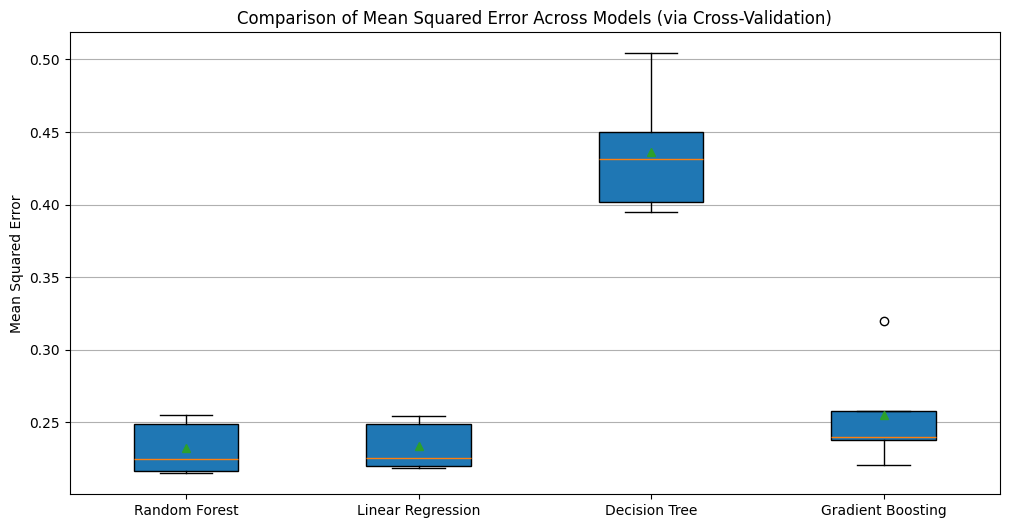

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt

# Define the models to compare
models = {
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42, max_depth=20, max_features='sqrt', min_samples_leaf=2, min_samples_split=2),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42, max_depth=20),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, random_state=42, max_depth=5)
}

# Use cross-validation to calculate MSE for each model
mse_results = {}

# Create a scorer for negative MSE (since scikit-learn minimizes scores)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

for name, model in models.items():
    neg_mse_scores = cross_val_score(model, X, y, scoring=mse_scorer, cv=5)  # 5-fold cross-validation
    mse_scores = -neg_mse_scores  # Convert negative MSE to positive
    mse_results[name] = mse_scores

# Prepare data for the boxplot
boxplot_data = [scores for scores in mse_results.values()]
labels = list(mse_results.keys())

# Create the boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(boxplot_data, labels=labels, patch_artist=True, showmeans=True)
plt.title('Comparison of Mean Squared Error Across Models (via Cross-Validation)')
plt.ylabel('Mean Squared Error')
plt.grid(axis='y')
plt.show()


Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized RMSE: 0.4684004734553313

In [17]:
df.columns

Index(['latitude', 'longitude', 'mag', 'clustering_coefficient_30_days',
       'std_mag_30_days', 'rolling_mean_depth_30_days',
       'earthquakes_last_30_days', 'b_value', 'b_value_increment_i_i2',
       'b_value_increment_i2_i4', 'b_value_increment_i4_i6',
       'b_value_increment_i6_i8', 'b_value_increment_i8_i10',
       'max_mag_last_week', 'eta', 'delta_M', 'elapsed_time',
       'coefficient_of_variation', 'dE1_2', 'class'],
      dtype='object')

In [2]:
print(type(X))  # Check the type of X
print(X[:10])    # Check the first few values of X

<class 'pandas.core.frame.DataFrame'>
    latitude   longitude  clustering_coefficient_30_days  std_mag_30_days  \
0  33.736167 -117.543667                        0.761985         0.450064   
1  34.231167 -117.613333                        0.763917         0.447643   
2  34.448333 -119.028667                        0.759888         0.471666   
3  33.987667 -117.246500                        0.763414         0.473813   
4  34.453500 -117.954333                        0.760808         0.477744   
5  34.107333 -117.473167                        0.763731         0.475707   
6  34.161167 -117.940000                        0.761076         0.472192   
7  34.348000 -118.567167                        0.762296         0.469563   
8  34.469333 -118.029333                        0.760838         0.474202   
9  34.346833 -118.572667                        0.762747         0.471447   

   rolling_mean_depth_30_days  earthquakes_last_30_days   b_value  \
0                   10.010000                

In [ ]:
import numpy as np
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape(len(X_grid),1) 
  
plt.scatter(X,y, color='blue') #plotting real points
plt.plot(X_grid, model.predict(X_grid),color='green') #plotting for predict points
  
plt.title("Random Forest Regression Results")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

TypeError: arange() not supported for inputs with DType <class 'numpy.dtype[str_]'>.

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
#tree_to_plot = model.estimators_[0]

# Plot the decision tree
#plt.figure(figsize=(320, 160))
#plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
#plt.title("Decision Tree from Random Forest")
#plt.show()

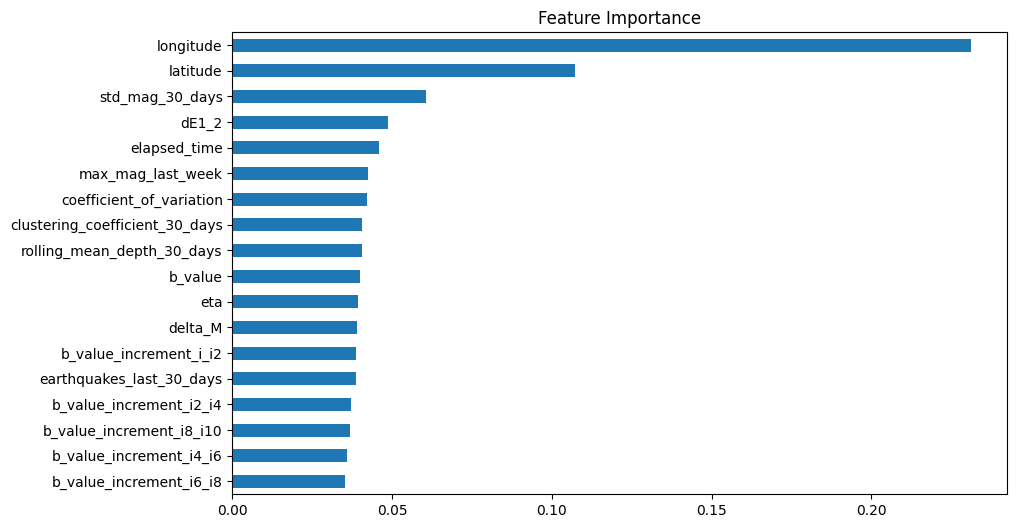

In [7]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()
# Identifies which features most influence the model's predictions, allowing you to focus on the most critical variables. It also helps in dimensionality reduction by potentially removing less important features.

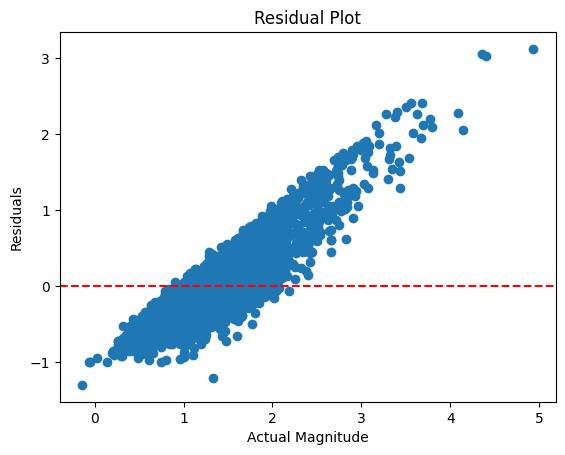

In [8]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Magnitude")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
#

 Identifies which features most influence the model's predictions, allowing you to focus on the most critical variables. It also helps in dimensionality reduction by potentially removing less important features.

In [9]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = (-cv_scores) ** 0.5
print(f"Cross-Validated RMSE: {rmse_scores.mean():.3f} ± {rmse_scores.std():.3f}")

Cross-Validated RMSE: 0.481 ± 0.017


Ensures your model's performance is consistent across different subsets of the dataset, reducing the risk of overfitting or underfitting. It provides a more robust measure of model performance than a single train-test split.


In [10]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')


MAE: 0.34155603427993186


In [11]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')


R²: 0.22404405702601193


MAE: Measures average absolute errors, making it easier to interpret in the context of the data.
R²: Indicates how well the model explains the variance in the data, providing a broader perspective on goodness-of-fit.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
}

for name, reg in models.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    print(f"{name} RMSE: {rmse}")


Linear Regression RMSE: 0.47798546898917993
Support Vector Regressor RMSE: 0.534452451019029
Gradient Boosting Regressor RMSE: 0.4704294672808232


/Users/declanbest/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/declanbest/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/Users/declanbest/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/declanbest/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/inspect.py", line 3062, in bind
    return self._bind(args, kwargs)
  File "/Library/Developer/CommandLineTools/Librar

Linear Regression: [nan nan nan nan nan]
Support Vector Regressor: [nan nan nan nan nan]
Gradient Boosting Regressor: [nan nan nan nan nan]


/Users/declanbest/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/declanbest/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/Users/declanbest/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/Users/declanbest/Library/Python/3.9/lib/python/site-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/inspect.py", line 3062, in bind
    return self._bind(args, kwargs)
  File "/Library/Developer/CommandLineTools/Librar

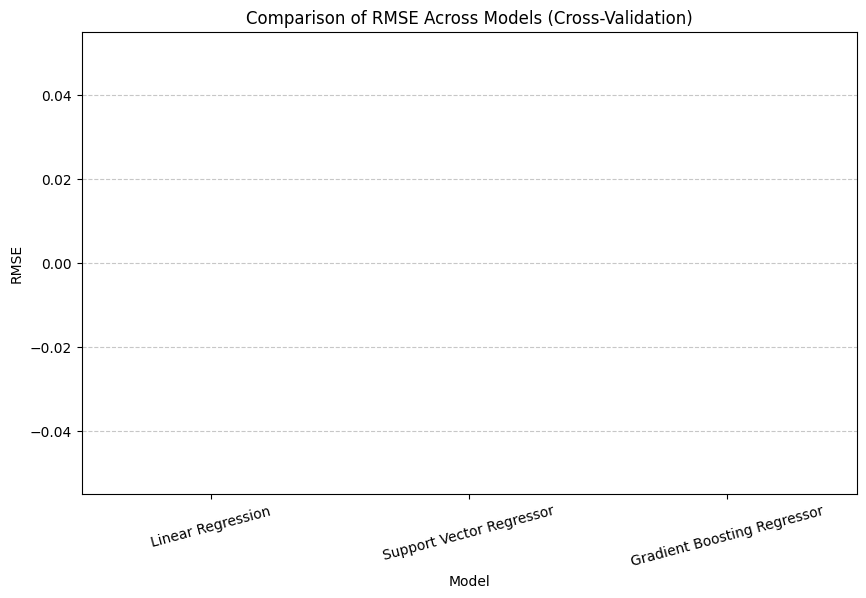

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
}

# RMSE scores for each model
rmse_scores = {}

# Define RMSE as a scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Perform cross-validation and collect RMSE scores
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, scoring=scorer, cv=5)  # 5-fold CV
    rmse_scores[name] = -scores  # Negate since mean_squared_error outputs negative scores in this setup

for name, scores in rmse_scores.items():
    print(f"{name}: {scores}")


# Plot box-and-whisker plot
plt.figure(figsize=(10, 6))
plt.boxplot(rmse_scores.values(), labels=rmse_scores.keys(), patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE Across Models (Cross-Validation)')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


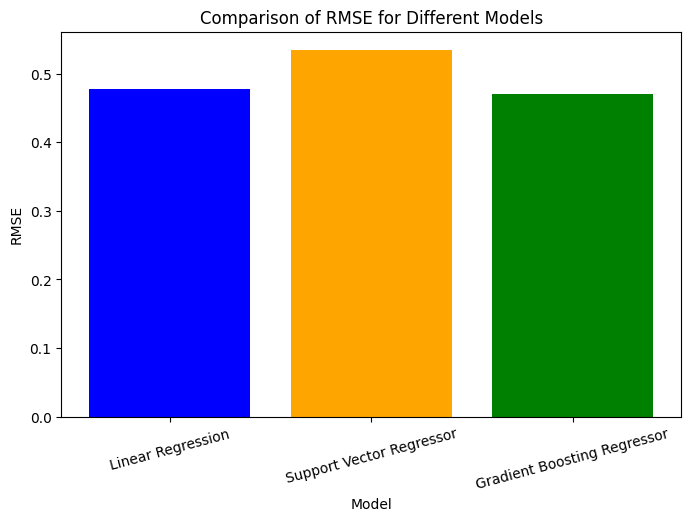

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regressor": SVR(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
}

# Store RMSE values
rmse_values = {}

# Train and evaluate models
for name, reg in models.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5
    rmse_values[name] = rmse

# Plot the RMSE comparison
plt.figure(figsize=(8, 5))
plt.bar(rmse_values.keys(), rmse_values.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.xticks(rotation=15)
plt.show()


Helps determine whether the chosen model (Random Forest in this case) is the best for the dataset. Other models might perform better or be more computationally efficient, depending on the problem.

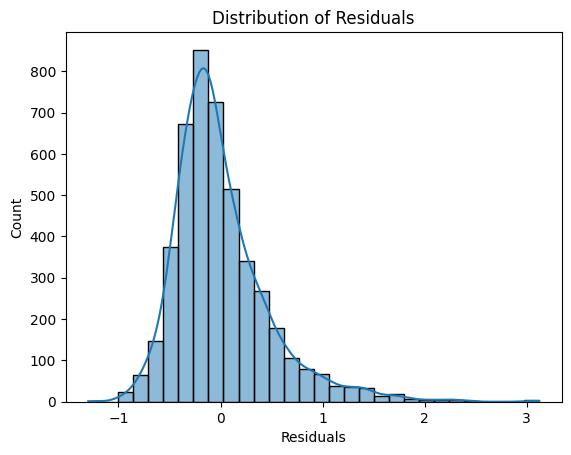

In [13]:
import seaborn as sns
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()


Ensures the errors are normally distributed and unbiased. Skewed error distributions can signal that the model is systematically over- or under-predicting for certain values.


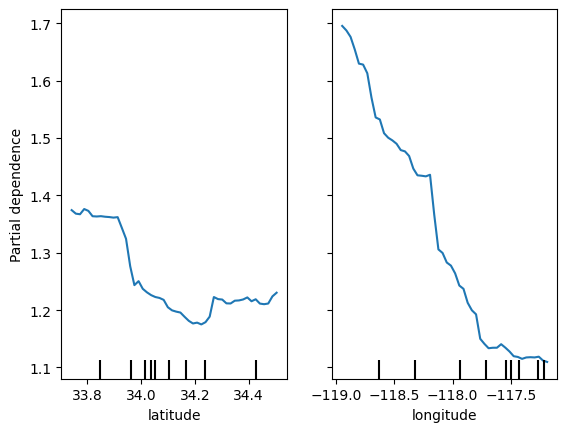

In [14]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(model, X_test, ['latitude', 'longitude'], grid_resolution=50)
plt.show()


Visualizes the relationship between specific features and the target variable, helping you interpret the model's behavior and check if it aligns with domain knowledge.

In [3]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available CPUs
                           verbose=2)

grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f'Optimized RMSE: {rmse}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

/Users/declanbest/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
507 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/declanbest/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/declanbest/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/declanbest/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 436, in _validate_params
    val

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized RMSE: 0.4684004734553313


Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Optimized RMSE: 0.4684004734553313